Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:
<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for this work. It was interesting to check. 
* The code is easy to read and understand. I was really surprised!
* I especially liked that you're interested in hypothesis testing. I left a quick guide in the end. You can ask a tutor for relevant additional materials.
* There are some comments to help you to improve your project. It doesn't mean that you did something wrong. These comments can help you to further develop your skills.
* Keep up the good work, and good luck on the next sprint!

# Step 1. Inspect the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Use more of the page width
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

<div class="alert alert-block alert-success">
<b>Success:</b> Very good that all imports are at the beginning of the notebook.
</div>

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- There are NaN values in several columns
- User_Score is represented numerically but has an 'object' type
- Year of release represents the year when the game was released, so it should be an integer, not a float

In [6]:
#Looking for the NaN data
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Looking for duplicates
data.duplicated().sum()

0

 - The dataset doesn't have apparent duplicates, but has NaN's in several columns.

Let's inspect the columns

In [8]:
len(data['Name'].value_counts())

11559

In [9]:
len(data.loc[data['Name'].isna()])

2

- The dataset contains 11559 kind of games, and additionally 2 games with NaN name

In [10]:
len(data['Platform'].value_counts())

31

In [11]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

- There are 31 different game platforms

In [12]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [13]:
len(data['Genre'].value_counts())

12

- There are 12 different genres represented in the dataset

In [14]:
data['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

It looks like all the values are integers, but the column has a type of float. Let's check if all the values are indeed integers (except for NaN)

In [15]:
tmp = data.copy()
tmp = tmp.loc[tmp['Critic_Score'].isna()==False]
tmp.Critic_Score.apply(float.is_integer).all()

True

- The values in the Critic_Score column are integers, so we need to change the type of the column from float to int

<div class="alert alert-block alert-success">
<b>Success:</b> All above conclusions were absolutely right!
</div>

In [16]:
data['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.2       2
1.1       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

- There is a 'tbd' user score which explains why the User_Score column has an 'object' type. Let's replace tbd with NaN

<div class="alert alert-block alert-success">
<b>Success:</b> Replacing 'tbd' with NaN is the best solution!
</div>

In [17]:
data['User_Score'] = data['User_Score'].replace('tbd',np.nan)

In [18]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [19]:
len(data['Rating'].value_counts())

8

- There are 8 different Rating values

Overall:
- We've seen quite a few NaN values, and we should figure out how to replace them. Moreover, aside from clear NaN values, we have values such as tbd in User_score, which are in the essence the same missing values we should replace or account for
- The types of User_Score, Critic_Score and Year_of_Release should be changed

<div class="alert alert-block alert-success">
<b>Success:</b> This step was done perfectly but some parts should be in the second step.
</div>

# Step 2. Prepare the data

 - Replace the column names (making them lowercase).

In [20]:
data.columns = map(str.lower, data.columns)

In [21]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Converting the data to the required types now would produce errors, because we still hve NaNs and tbd to deal with. So let's replace the missing values first

<div class="alert alert-block alert-success">
<b>Success:</b> It's the best way to lowercase letters! I would do the same.
</div>

 - Replace missing variables

In [22]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

##### Name column

In [23]:
miss_name = data.loc[data['name'].isna()]
miss_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- The games miss the values in almost half the columns
- Judging from the numbers the games are old and were not popular

Therefore we might drop these two entries from our dataset, especially since 2 games will not affect our results much

In [24]:
data.drop(miss_name.index, inplace=True)

<div class="alert alert-block alert-success">
<b>Success:</b> Well done!
</div>

##### Year of Release column

In [25]:
miss_year = data.loc[data['year_of_release'].isna()]
miss_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Let's see if there's a particular game which usually have NaNs in year_of_release

In [26]:
miss_year['name'].value_counts()

LEGO Harry Potter: Years 5-7                   7
Rock Band                                      4
Happy Feet Two                                 4
Test Drive Unlimited 2                         3
Bejeweled 3                                    3
                                              ..
LEGO Indiana Jones: The Original Adventures    1
Smashing Drive                                 1
Shaun White Snowboarding                       1
Yoostar on MTV                                 1
Harvest Moon: Save the Homeland                1
Name: name, Length: 232, dtype: int64

It doesn't seem like there's a game in particular because we have 232 unique names in the miss_year dataset. Let's take a closer look at one of these games, say LEGO Harry Potter: Years 5-7

In [27]:
data[data['name'] == 'LEGO Harry Potter: Years 5-7']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.0,0.07,69.0,NaN,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.0,0.06,NaN,NaN,E10+
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


Ha! There are 8 entries in our original dataset with such a name, and one of them has year_of_release listed, while others don't. It might be that when the dataset was being made, the producers filled the name and platform, but thought that entering the year_of_release just once would be sufficient. When the company wants to make a multiplatform game, it usually releases a game in the same year. So let's fill year_of_release in that fashion. In particular, for each game with NaN year_of_release if there's another entry with the same name and numerical year_of_release, we'll use that nuumerical year_of_release to fill in the missing variables.

In [28]:
existing_year = data[data['year_of_release'].isna() == False]

In [29]:
def fill_year(df):
    
    #find the entries with the same name
    res = existing_year[existing_year['name'] == df['name']]
    
    #if we have any entries take year_of_release
    if len(res)>0:
        return res.iloc[0]['year_of_release']
    


In [30]:
data['year_of_release'] = data.apply(fill_year, axis=1)


In [31]:
len(data.loc[data['year_of_release'].isna()])

146

We still have 146 missing values. Since there is no other data available we could potentially group them by genre and assign each the median year_of_release. However, it might shift our distribution so let's leave them as they are

<div class="alert alert-block alert-success">
<b>Success:</b> You did an excellent job filling missing values in this column!
</div>

###### Critic score column

In [32]:
data['critic_score'].head(20)

0     76.0
1      NaN
2     82.0
3     80.0
4      NaN
5      NaN
6     89.0
7     58.0
8     87.0
9      NaN
10     NaN
11    91.0
12     NaN
13    80.0
14    61.0
15    80.0
16    97.0
17    95.0
18     NaN
19    77.0
Name: critic_score, dtype: float64

In [33]:
#take non_null entries of the critic_score column
int_critic_score = data.loc[data['critic_score'].isna()==False]

#take null value entries of the critic_score column
null_critic_score = data.loc[data['critic_score'].isna()]

#cast int_critic_score into int
int_critic_score['critic_score'] = int_critic_score['critic_score'].astype('int64')
int_critic_score.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58,6.6,E


In [34]:
#percentage of the missing values in the dataset
len(null_critic_score)*100/(len(null_critic_score) + len(int_critic_score)) 

51.313348890085564

Since critic score is based on the opinions of people (critics) and not on numeric calcultions, there's not much we can do to  fill the missing values. We could potentially group the dataset by genre and year and assign the median of the particular year and genre to the missing value of that year and genre, but it will significantly affect our conclusion.  51.3% of the values are missing so we can't just fill them with median. Let's leave them as they are

###### User score column

In [35]:
data['user_score'].head(20)

0       8
1     NaN
2     8.3
3       8
4     NaN
5     NaN
6     8.5
7     6.6
8     8.4
9     NaN
10    NaN
11    8.6
12    NaN
13    7.7
14    6.3
15    7.4
16    8.2
17      9
18    NaN
19    7.9
Name: user_score, dtype: object

In [36]:
#take non_null entries of the user_score column
fl_user_score = data.loc[data['user_score'].isna()==False]

#take null value entries of the user_score column
null_user_score = data.loc[data['user_score'].isna()]

fl_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


In [37]:
#percentage of missing values in the user_score column
len(null_user_score)*100/(len(null_user_score) + len(fl_user_score)) 

54.586250224376236

Again, as in the case with the critic score, the amount of missing values is too big to be filled just with the median. So, let's leave them as they are

###### Rating column

In [38]:
data['rating'].head(20)

0       E
1     NaN
2       E
3       E
4     NaN
5     NaN
6       E
7       E
8       E
9     NaN
10    NaN
11      E
12    NaN
13      E
14      E
15      E
16      M
17      M
18    NaN
19      E
Name: rating, dtype: object

In [39]:
#take non_null entries of the rating  column
real_rating = data.loc[data['rating'].isna()==False]

#take null value entries of the rating column
null_rating  = data.loc[data['rating'].isna()]

real_rating.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E


We see that for every rating there's a numeric critic_score and user_score. So if the scores and rating are associated, and we left scores unchanged we might as well leave rating missing values unchanged

Let's see if there is a missing rating for an entry with non-missing critic_score and user_score

In [40]:
attm = data.query("rating == 'NaN' and critic_score != 'NaN' and user_score != 'NaN' ")
attm

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


There's no such entry. Let's check the percetage of missing values in the column

In [41]:
len(null_rating)*100/(len(null_rating)+len(real_rating))

40.4714892598576

40.47% percent of the entries are missing, so we can't just fill them with median. And, as mentioned above, since we left critic_score and user_score columns unchanged, let's leave the rating unchanged as well.

<div class="alert alert-block alert-success">
<b>Success:</b> Leaving these 3 columns as-is was the best solution. Well done!
</div>

 - Convert the data to the required types.

In [42]:
data['user_score'] = data['user_score'].astype('float64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('Int64')

- Calculate the total sales for each game 

In [43]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [44]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [45]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success">
<b>Success:</b> This step was done perfectly! I especially liked that you printed <span style="font-family: monospace"> .head() </span> after each change. It's a very good habit. Keep it up!
</div>

# Step 3. Analyze the data

- Look at how many games were released in different years

In [46]:
games_each_year = data[['name','year_of_release']].pivot_table(index='year_of_release',values=['name'],aggfunc='count')

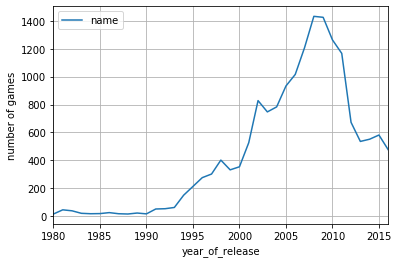

In [47]:
games_each_year.plot(grid=True).set(ylabel = 'number of games')
plt.show()

Data for every period in not significant. WE see that growth started in 1990's, approximately at the time when personal computers were released.  We're interested in the modern perion so we might analyze the period fromm 2000 till now.

<div class="alert alert-block alert-success">
<b>Success:</b> Great! Correct type of plot was used.
</div>

###### Change in platforms

- Look at how sales varied from platform to platform

In [48]:
# we have many platforms so let's write a function to calculate the total sales
def platf_total_sales(df):
    res = df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum')
    res = res.sort_values(by='total_sales', ascending=False)
    return res

In [49]:
res = platf_total_sales(data)

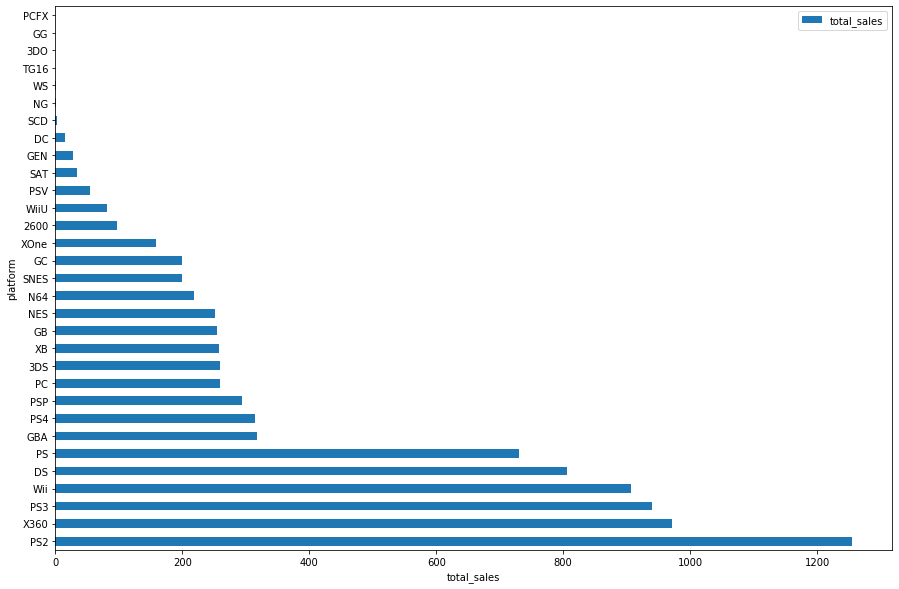

In [50]:
res.plot(kind='barh', figsize= (15,10)).set(ylabel='platform',xlabel='total_sales')
plt.show()

- PS2, X360, PS3, Wii, DS, PS are the gaming platforms with most sales

<div class="alert alert-block alert-success">
<b>Success:</b> Again, you've used the most suitable type of plot. Glad that you've sorted the result.
</div>

 - Choose the platforms with the greatest total sales and build a distribution based on data for each year

In [51]:
most_sold_platforms = res.head(6)

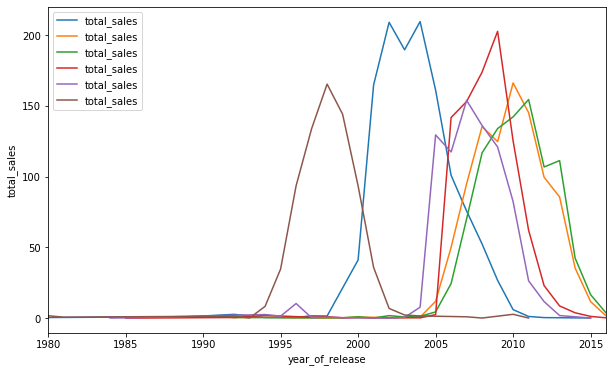

In [52]:
#Building a distribution
for plat in list(most_sold_platforms.index):
    data.query("platform == @plat").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)['total_sales'].plot(figsize=(10,6),legend=True).set(ylabel='total_sales')


<div class="alert alert-block alert-info">
<b>Improve: </b> Don't forget about the legend.
</div>

From the graph we see that the life span of a platform is between 10 and 15 years

Now let's work with the data we consider relevant,i.e data from 2000 till now

In [53]:
relevant_data = data.query('year_of_release>=2000')

In [54]:
relevant_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


###### Which platforms are leading in sales? 

In [55]:
relevant_sales = relevant_data.pivot_table(index='platform', values = 'total_sales', aggfunc='sum')
relevant_sales = relevant_sales.sort_values(by='total_sales', ascending=False)

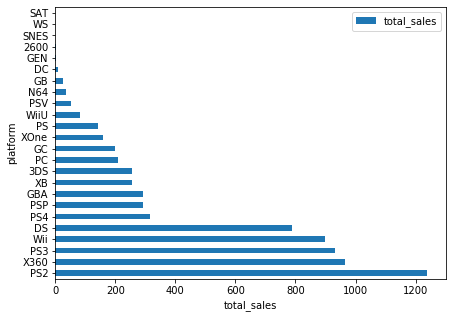

In [111]:
relevant_sales.plot(kind='barh',figsize= (7,5)).set(ylabel='platform',xlabel='total_sales')
plt.show()

The distribution is similar to the one we had before, but now we have only 5 leading platforms istead of 6. 

###### Which platforms are growing or shrinking?

In [57]:
list(relevant_data['platform'].sort_values().drop_duplicates())

['2600',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'N64',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SNES',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [58]:
relevant_data.loc[relevant_data['platform']=='2600']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2218,Spider-Man,2600,2000,Action,0.87,0.05,0.0,0.01,NaN,NaN,NaN,0.93


Single entry can't be plotted, for the useful analysis let's ignore this platform

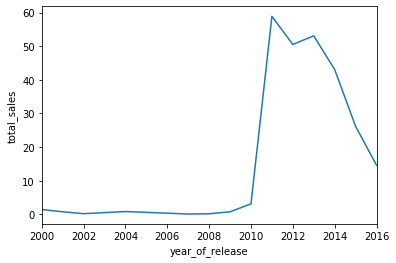

In [59]:
relevant_data.loc[relevant_data['platform']=='3DS'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

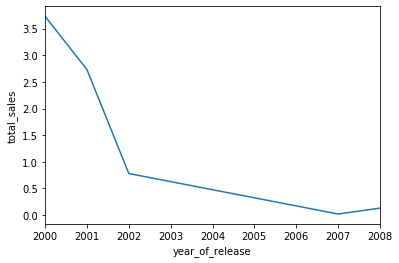

In [60]:
relevant_data.loc[relevant_data['platform']=='DC'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

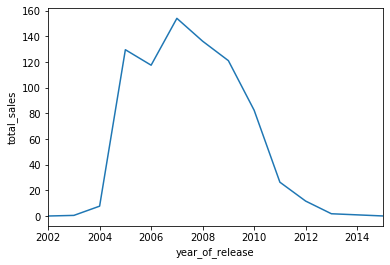

In [61]:
relevant_data.loc[relevant_data['platform']=='DS'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

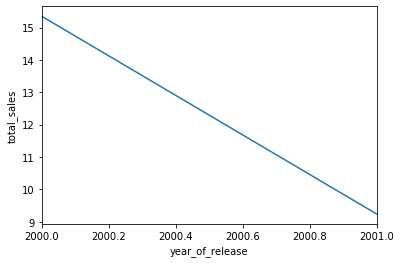

In [62]:
relevant_data.loc[relevant_data['platform']=='GB'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

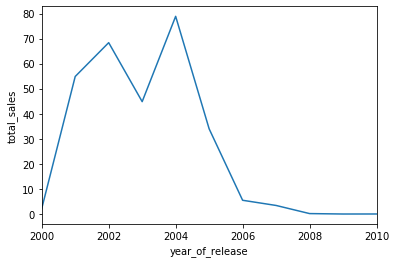

In [63]:
relevant_data.loc[relevant_data['platform']=='GBA'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

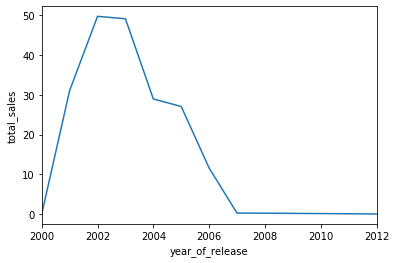

In [64]:
relevant_data.loc[relevant_data['platform']=='GC'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

In [65]:
relevant_data.loc[relevant_data['platform']=='GEN']
#single entry can't be plotted on the time scale so let's ignore this platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
564,Mortal Kombat,GEN,2011,Fighting,1.95,0.63,0.0,0.09,NaN,NaN,NaN,2.67


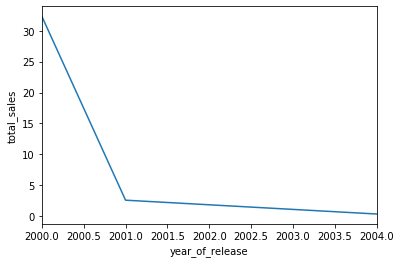

In [66]:
relevant_data.loc[relevant_data['platform']=='N64'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

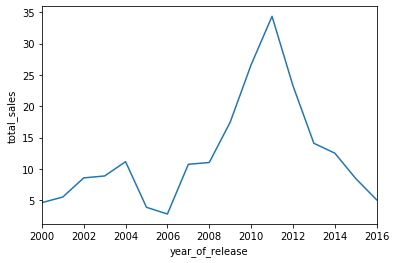

In [67]:
relevant_data.loc[relevant_data['platform']=='PC'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

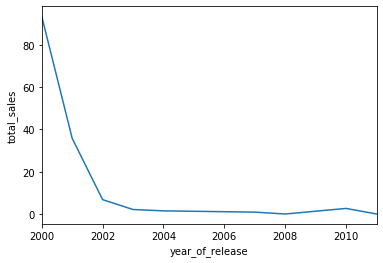

In [68]:
relevant_data.loc[relevant_data['platform']=='PS'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

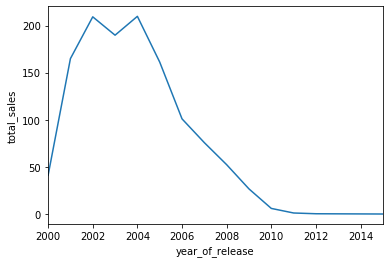

In [69]:
relevant_data.loc[relevant_data['platform']=='PS2'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

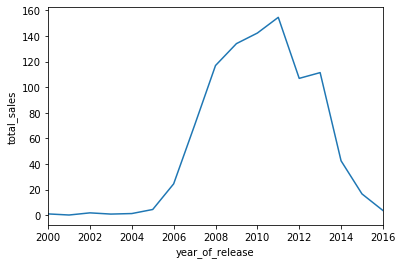

In [70]:
relevant_data.loc[relevant_data['platform']=='PS3'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

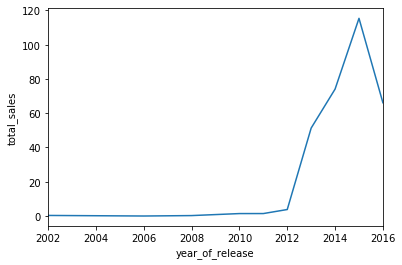

In [71]:
relevant_data.loc[relevant_data['platform']=='PS4'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

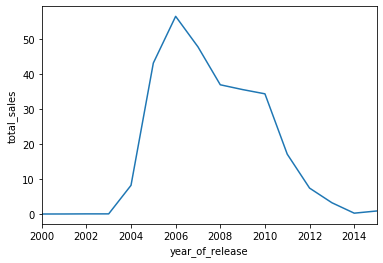

In [72]:
relevant_data.loc[relevant_data['platform']=='PSP'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

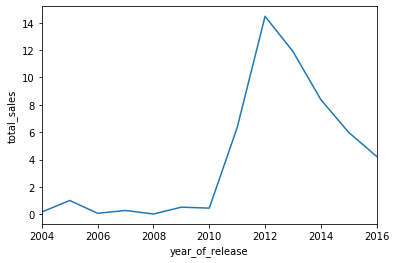

In [73]:
relevant_data.loc[relevant_data['platform']=='PSV'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

In [74]:
relevant_data.loc[relevant_data['platform']=='SAT']
#this is a single entry, so let's ignore it

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13767,World Series Baseball,SAT,2002,Sports,0.0,0.0,0.04,0.0,NaN,NaN,NaN,0.04


In [75]:
relevant_data.loc[relevant_data['platform']=='SNES']
#this is a single entry so let's ignore it

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4835,Mystery Dungeon: Shiren the Wanderer,SNES,2006,Role-Playing,0.0,0.0,0.4,0.0,NaN,NaN,NaN,0.4


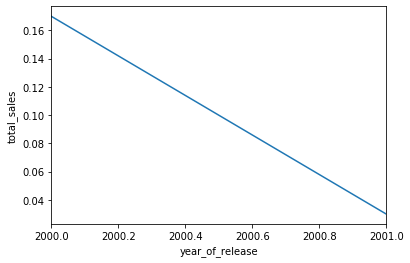

In [76]:
relevant_data.loc[relevant_data['platform']=='WS'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

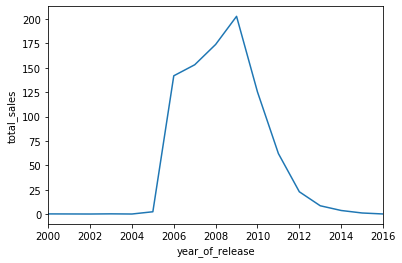

In [77]:
relevant_data.loc[relevant_data['platform']=='Wii'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

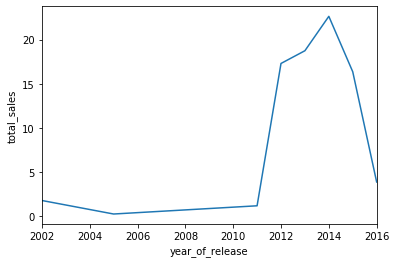

In [78]:
relevant_data.loc[relevant_data['platform']=='WiiU'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

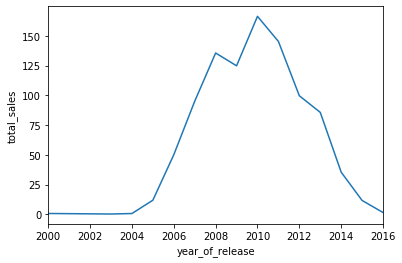

In [79]:
relevant_data.loc[relevant_data['platform']=='X360'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

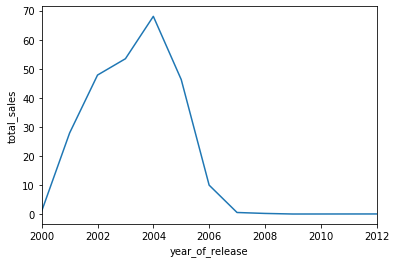

In [80]:
relevant_data.loc[relevant_data['platform']=='XB'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

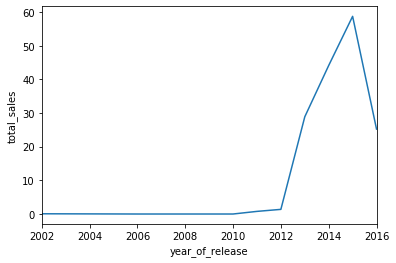

In [81]:
relevant_data.loc[relevant_data['platform']=='XOne'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').sort_values(by='year_of_release',ascending=False)['total_sales'].plot().set(ylabel='total_sales')
plt.show()

All of the platform have downward sloping trend, which means they are gradually becoming obsolete. So far, only 3DS, PS4 and XOne are somewhat popular. 3DS has also decent sales numbers, but we expect it to decrease soon

<div class="alert alert-info" role="alert">
  This part would look and work better if I were to include some kind of a loop, and if I was able to place the figures side by side (in a smaller scale). I couldn't implement it properly, so your advice on how to do it will be very appreciated )
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> You can see a good guide <a href="https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step"> here </a>.
</div>

###### A box plot for the global sales of all games, broken down by platform

In [82]:
ds = relevant_data.query("platform == '3DS'")

In [83]:
ds.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,512.000000,512.000000,512.000000,512.000000,512.000000,167.000000,172.000000,512.000000
mean,2012.888672,0.157988,0.117441,0.195020,0.025391,67.179641,6.850000,0.495840
std,2.079936,0.533425,0.413336,0.523613,0.087678,12.421952,1.418405,1.431289
min,2000.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.400000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,58.500000,6.000000,0.050000
50%,2013.000000,0.010000,0.000000,0.050000,0.000000,68.000000,7.100000,0.120000
75%,2014.000000,0.120000,0.070000,0.132500,0.020000,77.000000,7.900000,0.332500
max,2016.000000,5.280000,4.190000,4.390000,0.910000,92.000000,9.100000,14.600000


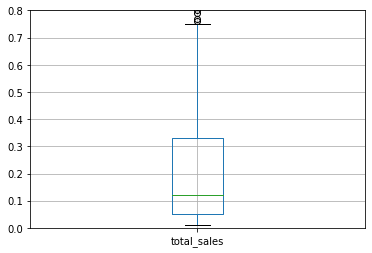

In [84]:
plt.ylim(0,0.8)
ds.boxplot(column='total_sales')
plt.show()

In [85]:
ps4 = relevant_data.query("platform == 'PS4'")

In [86]:
ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,391.000000,391.000000,391.000000,391.000000,391.000000,251.000000,256.000000,391.000000
mean,2014.846547,0.278056,0.360793,0.040818,0.123632,72.115538,6.747266,0.803299
std,1.502812,0.584325,0.811699,0.069159,0.255087,12.504983,1.462255,1.611068
min,2002.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2014.000000,0.005000,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.050000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


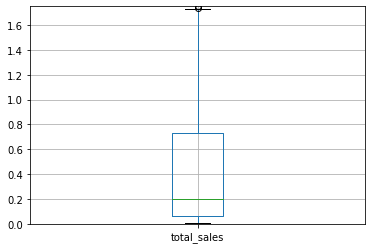

In [87]:
plt.ylim(0,1.75)
ps4.boxplot(column='total_sales')
plt.show()

In [88]:
xone = relevant_data.query("platform == 'XOne'")

In [89]:
xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.639676,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,1.552511,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2002.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


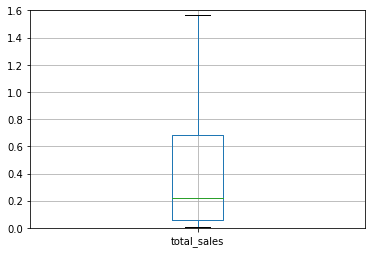

In [90]:
plt.ylim(0, 1.6)
xone.boxplot(column = 'total_sales')
plt.show()

- XOne and PS4 sell twice as much as 3DS
- PS4 sells a little more than XOne

<div class="alert alert-block alert-info">
<b>Improve: </b> The best solution here is to plot all boxplots in one line. You can do it with the help of <span style="font-family: monospace"> plt.boxplot() </span>. There is also a good parameter <span style="font-family: monospace"> showfliers </span>. More info in <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html"> docs </a>.
</div>

##### How user and professional reviews affect sales for one popular platform

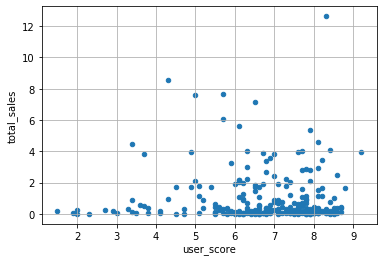

In [91]:
#we will work with PS4 platform
ps4.plot(kind='scatter', x='user_score', y='total_sales', grid=True)
plt.show()

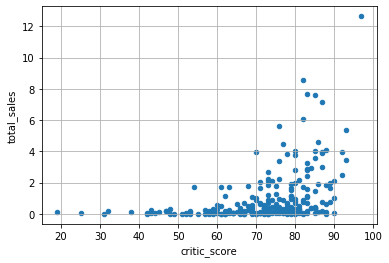

In [92]:
ps4.plot(kind='scatter', x='critic_score', y='total_sales', grid=True)
plt.show()

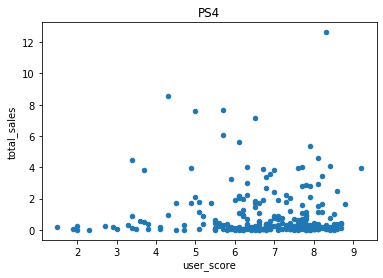

In [93]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')

In [94]:
param = ['user_score','critic_score','total_sales']
ps4[param].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.558297,-0.031603
critic_score,0.558297,1.000000,0.405922
total_sales,-0.031603,0.405922,1.000000


- user_score and total_sales are weakly anticorrelated.
- critic_score and total_sales are moderately correlated, so for an increase in critic score we see increased amount of sales

<div class="alert alert-block alert-success">
<b>Success:</b> Absolutely right!
</div>

###### Looking at the genre distribution

In [95]:
relevant_genre = relevant_data.pivot_table(index = 'genre', values = 'total_sales').sort_values(by='total_sales')

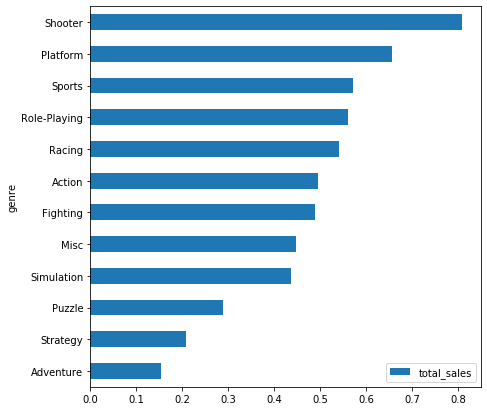

In [96]:
relevant_genre.plot(kind='barh', figsize=(7,7))
plt.show()

 - Shooter, Platform, Sports and Role-Playing are the most profittable genres
 - Puzzle, Strategy and Adventure are the least profittable genres

<div class="alert alert-block alert-success">
<b>Success:</b> This step was done very good.
</div>

# Step 4. Create a user profile for each region

###### North American region

- The top five platforms

In [97]:
na_platforms = relevant_data.pivot_table(index = 'platform', values = 'na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
na_platforms

,na_sales
platform,
X360,597.91
PS2,577.50
Wii,491.19
PS3,390.56
DS,373.66


 - X360, PS2, Wii, PS3 and DS are the most selling platforms in the North American region

- The top five genres 

In [98]:
na_genres = relevant_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
na_genres

,na_sales
genre,
Action,757.68
Sports,596.09
Shooter,498.99
Misc,361.11
Role-Playing,280.34


- Action, Sports, Shooter, Misc and Role_playing are the most popular genres in the North American region

- ESRB rating 

In [99]:
na_rating = relevant_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
na_rating

,na_sales
rating,
E,1252.72
M,730.86
T,713.30
E10+,350.01
EC,1.53


- E, M, T, E10+ and EC are the most popular rating in the North American region

###### European region

- top five platforms

In [100]:
eu_platforms = relevant_data.pivot_table(index = 'platform', values = 'eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
eu_platforms

,eu_sales
platform,
PS2,335.05
PS3,328.23
X360,269.01
Wii,260.59
DS,185.31


- PS2, PS3, X360, Wii and DS are the most popular platforms in the European region

- top 5 genres

In [101]:
eu_genres = relevant_data.pivot_table(index = 'genre', values = 'eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
eu_genres

,eu_sales
genre,
Action,470.42
Sports,342.64
Shooter,296.88
Misc,195.01
Racing,192.62


- Action, Sports, Shooter, Misc and Racing are the most popular genres in the European region

- ESRB rating

In [102]:
eu_rating = relevant_data.pivot_table(index = 'rating', values = 'eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
eu_rating

,eu_sales
rating,
E,691.98
M,475.02
T,394.99
E10+,187.00
AO,0.61


- E, M, T, E10+ and AO are the most popular ratings in the European region

###### Japanese region

- top five platforms

In [103]:
jp_platforms = relevant_data.pivot_table(index = 'platform', values = 'jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
jp_platforms

,jp_sales
platform,
DS,171.89
PS2,135.09
3DS,99.85
PS3,79.31
PSP,75.98


- DS,PS2, 3DS, PS3 and PSP are the most popular platforms in the Japanese region

- top five genres

In [104]:
jp_genres = relevant_data.pivot_table(index = 'genre', values = 'jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
jp_genres

,jp_sales
genre,
Role-Playing,236.14
Action,131.16
Misc,86.43
Sports,76.12
Platform,50.98


- Role-Playing, Action, Misc, Sports and Platform are the most popular genres in the Japanese region

- ESRB rating

In [105]:
jp_rating = relevant_data.pivot_table(index = 'rating', values = 'jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
jp_rating

,jp_sales
rating,
E,189.27
T,130.81
M,57.87
E10+,37.93
AO,0.00


- E, T, M, E10+ and AO are the most popular ratings in the Japanese region

Overall:
- North American and European regions have similar preferences, but Japanese region has very differnt preferences

<div class="alert alert-block alert-info">
<b>Improve: </b> In general, this part was done well. It could be done even better if pie charts were used.
</div>

# Step 5. Test the hypotheses

###### Hypothesis 1

H0 : Average user ratings of the Xbox One and PC platforms are the same. 

HA: Average user ratings of the Xbox One and PC platforms are not the same. 

In [106]:
pc = relevant_data.query("platform == 'PC'")

In [107]:
alpha = .05

#We are using t-test but the variances are not necessarily true, especially since we have a lot of missing values
result = st.ttest_ind(pc['user_score'],xone['user_score'],nan_policy = 'omit',equal_var=False)
p_val = result.pvalue
print('p-values',p_val)
if(p_val<alpha):
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')


p-values 1.3977983106497604e-05
We reject the null hypothesis


We reject the null hypothesis, therefore we conclude that the average user ratings of the Xbox One and PC platforms are not the same.

###### Hypothesis 2

H0: Average user ratings for the Action and Sports genres are not different

HA: Average user ratings for the Action and Sports genres are different

In [108]:
action_genre = relevant_data.query("genre == 'Action'")
sports_genre = relevant_data.query("genre == 'Sports'")

In [109]:
alpha = 0.05
result = st.ttest_ind(action_genre['user_score'], sports_genre['user_score'],nan_policy = 'omit',equal_var=False)
p_val = result.pvalue
print('p-values',p_val)
if(p_val<alpha):
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

p-values 0.13810159667532493
We do not reject the null hypothesis


p-values is larger than the alpha = .05, so we cannot reject the null hypothesis. We conclude that the average user ratings for the Action and Sports genres are not significantly different

<div class="alert alert-block alert-success">
<b>Success:</b> This part was done good. You can output the difference if the hypothesis is rejected.
</div>

# Step 6. Conclusion

In Step 1:
- we identified main problems being: wrong data types, and numerous missing values

In Step 2:
- We prepared the data, and replaced the missing values in some places

In Step 3 & Step 4:
- We analyzed the data
- Found that the platform last between 10 and 15 years
- Many platforms are in decline. The most popular ones now are PS4, XOne and 3DS
- Japanese region differs in taste from North American and European. Japanese people like games of Role-Playing and Action games, whereas North Americans and Eupoeans prefer Action, Sports and shooters

In Step 5: 
- We analyzed 2 hypotheses. In the first we rejected the null hypothesis, in the second we couldn't reject the null hypothesis
- We concluded that the average user ratings of the Xbox One and PC platforms are not the same
- We concluded that the average user ratings for the Action and Sports genres are not significantly different